<a href="https://colab.research.google.com/github/DermaUH/DermaUH-Challenge/blob/main/DermaUH_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!gdown https://drive.google.com/drive/folders/1Wqe4AorKj7d_yexSQ0QzUY1S5vvuKhox?usp=drive_link -O /content/images --folder

In [13]:
# Your code goes here, add the logic to preprocess the data,
# load and evaluate your model with the provided image

from PIL import Image
import random, math

def classify(img: Image):
  r = random.uniform(0, 4)
  return math.floor(r)

In [14]:
# Override this function with the one you
# will be using to classify the images.
# The resulting function should accept a Pil image and return
# its classification, encoded in a number from 0 to 3:
# 0: Basal Cell Carcinoma (bcc)
# 1: Melanom (mel)
# 2: Others (other)
# 3: Squamous Cell Carcinoma (scc)

my_classificator = classify

The sections below will be used to evaluate your model, please do not change it.

In [15]:
import glob
from tensorflow.keras.utils import load_img, img_to_array

labels = ['bcc', 'mel', 'other', 'scc']

def classificator(tensor):
  result = my_classificator(tensor)
  return labels[result]

basal = list(glob.glob('images/bcc/*.JPG'))
melanom = list(glob.glob('images/mel/*.JPG'))
other = list(glob.glob('images/other/*.JPG'))
squamous = list(glob.glob('images/scc/*.JPG'))

image_paths = basal + melanom + other + squamous

actual = (['bcc'] * len(basal)) + \
  (['mel'] * len(melanom)) + \
  (['other'] * len(other)) + \
  (['scc'] * len(squamous))

predicted = []
for path in image_paths:
  img = load_img(path, target_size=(224, 224))
  tensor = img_to_array(img)
  predicted.append(classificator(tensor))

# print(image_paths)
# print(actual)
# print(predicted)

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

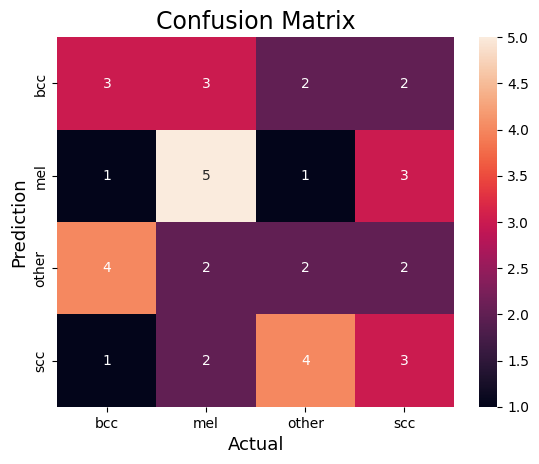

In [17]:
cm = confusion_matrix(actual,predicted)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

         bcc       0.33      0.30      0.32        10
         mel       0.42      0.50      0.45        10
       other       0.22      0.20      0.21        10
         scc       0.30      0.30      0.30        10

    accuracy                           0.33        40
   macro avg       0.32      0.33      0.32        40
weighted avg       0.32      0.33      0.32        40

